In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. Basic Visualizations

In [ ]:
# Load the dataset
data = pd.read_csv('/content/indiancrop_dataset.csv')

# Display the first few rows of the dataset
data.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice


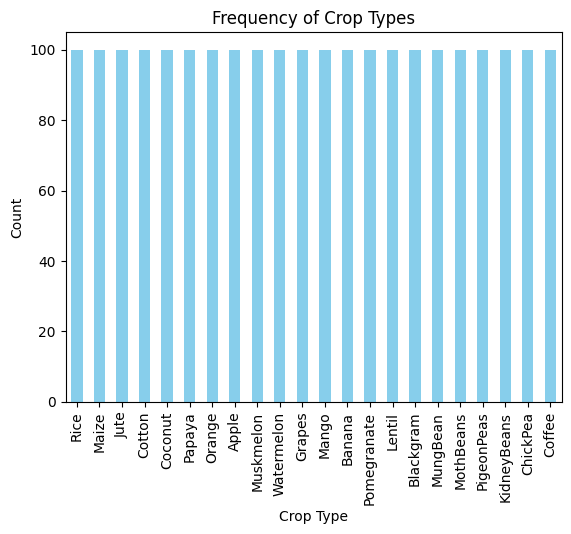

In [ ]:
# Bar chart for a categorical feature (e.g., crop_type)
data['CROP'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency of Crop Types')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.show()

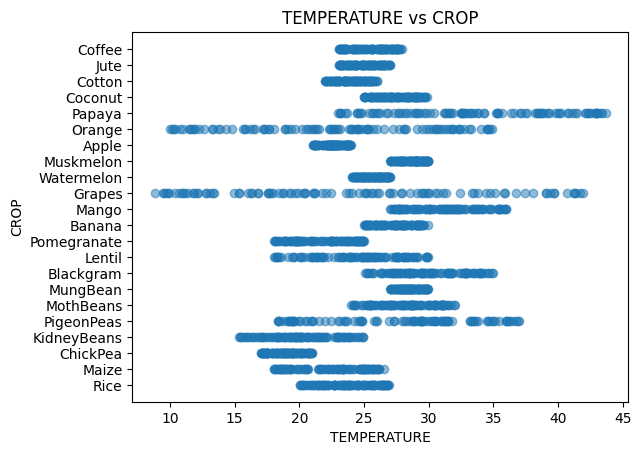

In [ ]:
# Scatter plot to explore relationships between features
plt.scatter(data['TEMPERATURE'], data['CROP'], alpha=0.5)
plt.title('TEMPERATURE vs CROP')
plt.xlabel('TEMPERATURE')
plt.ylabel('CROP')
plt.show()

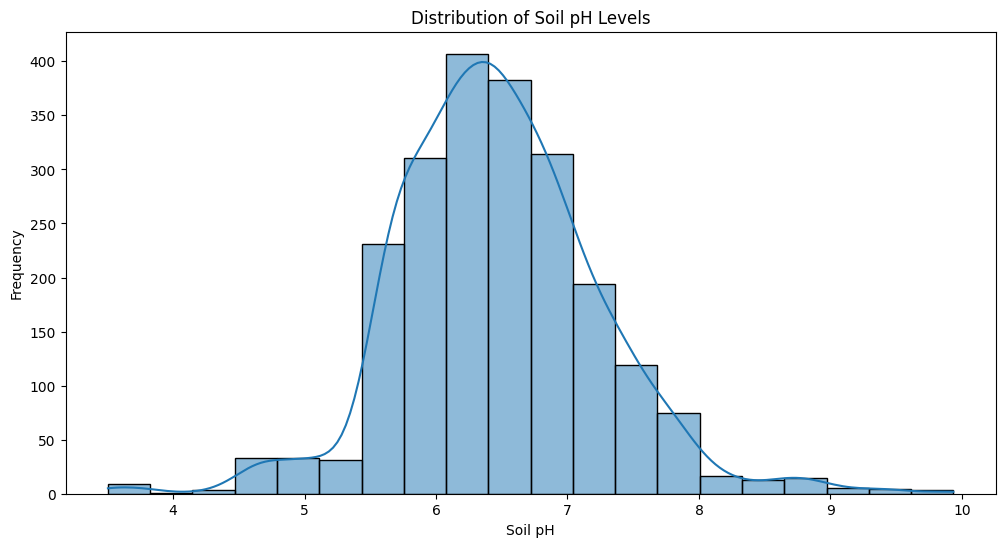

In [ ]:
# Soil Quality Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['ph'], bins=20, kde=True)
plt.xlabel('Soil pH')
plt.ylabel('Frequency')
plt.title('Distribution of Soil pH Levels')
plt.show()

2. Simple Exploratory Data Analysis (EDA)

In [ ]:
# Summary statistics
data.describe()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,2689.228182
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,3710.361267
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,2.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,950.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,1825.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,3500.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,120000.000000


In [ ]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 N_SOIL         0
P_SOIL         0
K_SOIL         0
TEMPERATURE    0
HUMIDITY       0
ph             0
RAINFALL       0
STATE          0
CROP_PRICE     0
CROP           0
dtype: int64


In [ ]:
# Encode categorical features (e.g., crop_type)
data_encoded = pd.get_dummies(data, columns=['CROP', 'STATE'])

# Display the first few rows of the encoded dataset
print(data_encoded.head())

   N_SOIL  P_SOIL  K_SOIL  TEMPERATURE   HUMIDITY        ph    RAINFALL  \
0      90      42      43    20.879744  82.002744  6.502985  202.935536   
1      85      58      41    21.770462  80.319644  7.038096  226.655537   
2      60      55      44    23.004459  82.320763  7.840207  263.964248   
3      74      35      40    26.491096  80.158363  6.980401  242.864034   
4      78      42      42    20.130175  81.604873  7.628473  262.717340   

   CROP_PRICE  CROP_Apple  CROP_Banana  ...  STATE_Odisha  STATE_Pondicherry  \
0        7000       False        False  ...         False              False   
1        5000       False        False  ...         False              False   
2        7000       False        False  ...         False              False   
3        7000       False        False  ...         False              False   
4      120000       False        False  ...         False              False   

   STATE_Punjab  STATE_Rajasthan  STATE_Tamil Nadu  STATE_Telangana 

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical features
numerical_features = ['TEMPERATURE', 'ph', 'CROP_PRICE']
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

In [ ]:
# Define features and target variable
X = data_encoded.drop('CROP_PRICE', axis=1)
y = data_encoded['CROP_PRICE']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.5381151581822619
R^2 Score: -0.08209096688035267


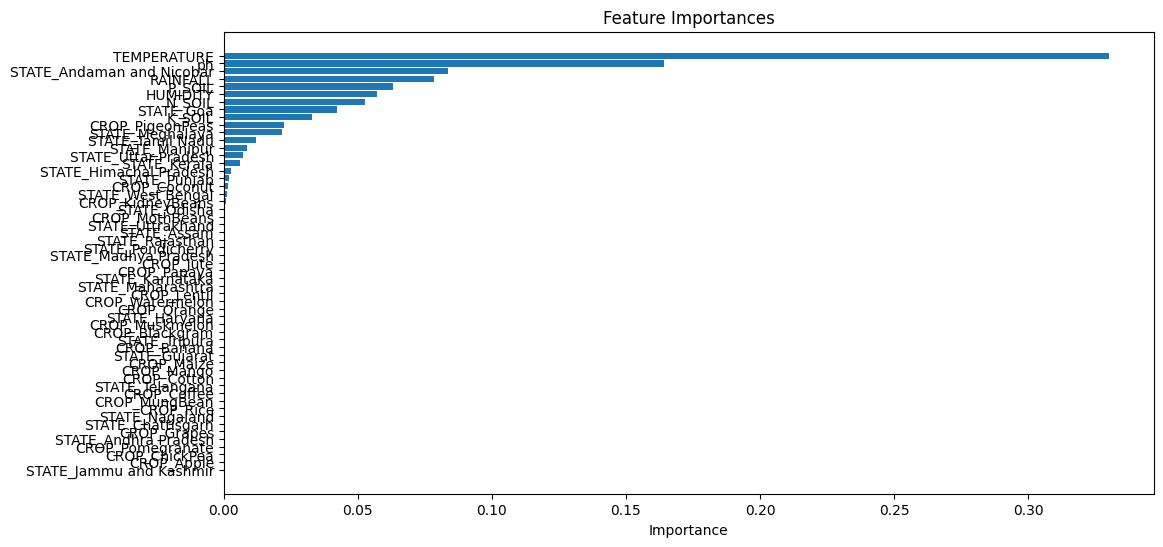

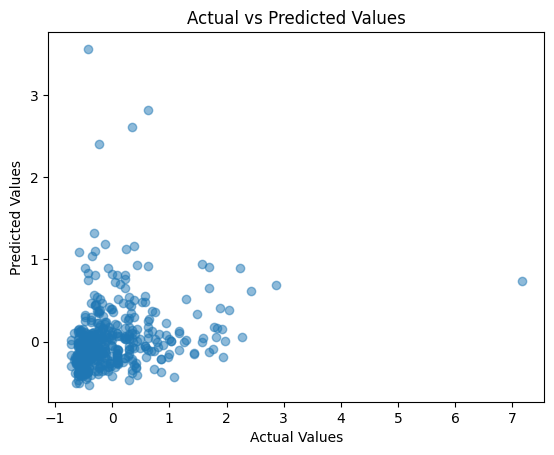

In [ ]:
# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel('Importance')
plt.show()

# Predictions vs Actual
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()